In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf  # for data
from pandas_datareader import data as pdr
yf.pdr_override()

In [97]:
def read_data(stock='TSLA'):


    df = pdr.get_data_yahoo(stock,period = "360d",

            # fetch data by interval (including intraday if period < 60 days)
            # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
            # (optional, default is '1d')
            interval = "1d",) 
    return df

In [98]:
df = read_data(stock='TSLA')

[*********************100%***********************]  1 of 1 completed


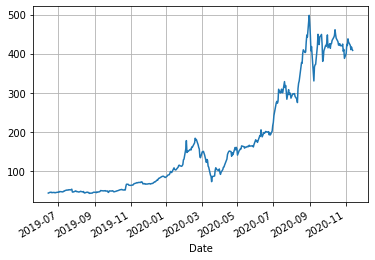

In [99]:
df['Close'].plot(grid = True);

In [56]:
# returns : 
daily_close = df[['Adj Close']]

In [57]:
daily_pct_change = (daily_close/daily_close.shift(1))-1

In [58]:
daily_pct_change.head(5)

,Adj Close
Date,
2019-06-14,NaN
2019-06-17,0.047041
2019-06-18,-0.001289
2019-06-19,0.007520
2019-06-20,-0.030076


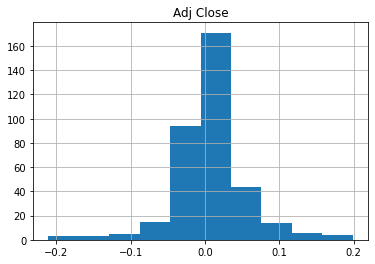

In [59]:
# looking at the histrgram
daily_pct_change.hist();


In [60]:
# inspect the daily statisics
daily_pct_change.describe()

,Adj Close
count,359.000000
mean,0.007506
std,0.049304
min,-0.210628
25%,-0.012925
50%,0.005352
75%,0.027204
max,0.198949


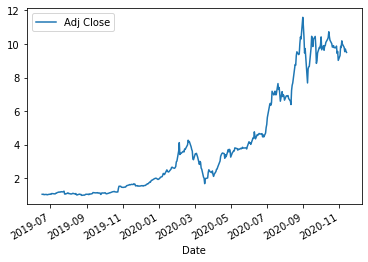

In [61]:
# plotting
cum_daily_return = (1+daily_pct_change).cumprod()
cum_daily_return.plot();

In [62]:
# how about monthly return
cum_daily_return.resample("M").mean()

,Adj Close
Date,
2019-06-30,1.036037
2019-07-31,1.127779
2019-08-31,1.047379
2019-09-30,1.103953
2019-10-31,1.239321
2019-11-30,1.574074
2019-12-31,1.757374
2020-01-31,2.459794
2020-02-29,3.710436


In [63]:
# changing the interval change the shape of the plot completely

### Multiple stocks

In [118]:
def read_multiple_data(stocks=['TSLA','LYFT']):
    
    """
    join data for multiple stocks with two keys, one for ticker and one for date
    
    """
    
    joind_data = map(read_data,stocks)

    return pd.concat(joind_data,keys = stocks, names = ['Ticker','Date'])

In [121]:
read_multiple_data(stocks=['TSLA','LYFT','AAPL'])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Ticker Date                                                                     
TSLA   2019-06-14   42.250000   43.330002   42.080002   42.984001   42.984001   
       2019-06-17   43.096001   45.400002   42.854000   45.006001   45.006001   
       2019-06-18   45.743999   46.948002   44.512001   44.948002   44.948002   
       2019-06-19   45.021999   45.554001   44.212002   45.285999   45.285999   
       2019-06-20   44.599998   45.380001   43.270000   43.924000   43.924000   
...                       ...         ...         ...         ...         ...   
AAPL   2020-11-09  120.500000  121.989998  116.050003  116.320000  116.320000   
       2020-11-10  115.550003  117.589996  114.129997  115.970001  115.970001   
       2020-11-11  117.190002  119.629997  116.440002  119.489998  119.489998   
       2020-11-12  119.620003  120.529999  118.570000  119.209999  119.209999   
       2020-11-13  119.440002  119.669998  117.870003  119.260002  119.260002   

                      Volume  
Ticker Date                   
TSLA   2019-06-14   37167000  
       2019-06-17   61584000  
       2019-06-18   63579000  
       2019-06-19   32875500  
       2019-06-20   59317500  
...                      ...  
AAPL   2020-11-09  154515300  
       2020-11-10  138023400  
       2020-11-11  112295000  
       2020-11-12  103162300  
       2020-11-13   81581900  

[1080 rows x 6 columns]